In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import platform
import keras
import tensorflow as tf

print("python version       :" + platform.python_version())
print("keras version        :" + keras.__version__)
print("tensorflow version   :" + tf.__version__)

python version       :3.8.5
keras version        :2.4.3
tensorflow version   :2.2.0


(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

&lt;matplotlib.image.AxesImage at 0x7f040d81f490&gt;

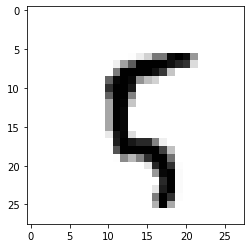

In [2]:
from matplotlib import pyplot as plt
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape
train_labels.shape
test_images.shape
test_labels.shape

img = train_images[100]
plt.imshow(img, cmap=plt.cm.binary)

In [3]:
from keras import models
from keras import layers
from keras.utils import to_categorical

network = keras.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'] )

train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255
train_labels = to_categorical(train_labels)

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2593 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1038 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0690 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0497 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0373 - accuracy: 0.9890


&lt;tensorflow.python.keras.callbacks.History at 0x7f040c06c3a0&gt;

In [4]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_loss : ", test_loss)
print("test_acc  : ", test_acc)

313/313 [==============================] - 0s 799us/step - loss: 0.0732 - accuracy: 0.9779
test_loss :  0.07319139689207077
test_acc  :  0.9779000282287598
